# Linear Regression

_Reference:_
[Julia Programming For Data Science & Machine Learning: Julia | Udemy](https://www.udemy.com/course/julialang/)

## Case 1

Given a dataset of Promote and Sales, predict how Promotion (marketing) budget can affect sales

In [1]:
using Pkg
using CSV, DataFrames

In [2]:
df = CSV.read("data/sales.csv", DataFrame)

Row,Promote,Sales
,Int64,Int64
1,23,554
2,56,1339
3,34,815
4,25,609
5,67,1600
6,82,2000
7,46,1000
8,14,300
9,6,150


In [3]:
X = df[!,:Promote]
Y = df[!,:Sales]

19-element Vector{Int64}:
  554
 1339
  815
  609
 1600
 2000
 1000
  300
  150
 1150
 1200
 2000
 1750
 2000
 1500
 1000
 1600
 2000
  550

In [4]:
# Pkg.add("Plots")
using Plots

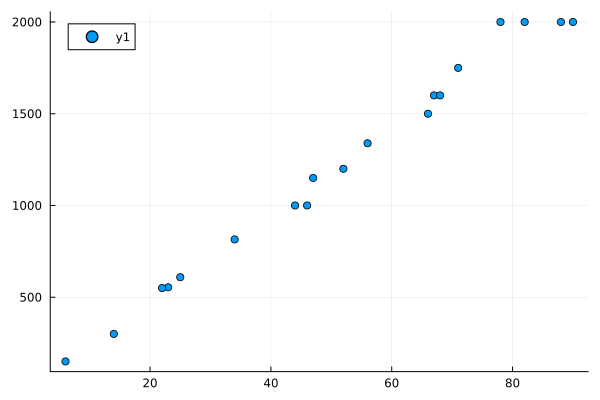

In [5]:
scatter(X, Y)

**Idea**

y  = mx + c

Sales = m * promote + c

Sales = Slope * promote + Intercept


$$ \Large y = c + mx $$
$$ \Large m = \frac{\Sigma({x - \bar{x}}) ({y - \bar{y}}) }{ \Sigma({x - \bar{x}})^2} $$
$$ \Large c = \bar{y} - m \bar{x} $$

In [6]:
using Statistics

In [7]:
m = sum((X .- mean(X)) .* (Y .- mean(Y))) / sum((X .- mean(X)) .* (X .- mean(X)))
c = mean(Y) - m .* mean(X);

see [More Dots: Syntactic Loop Fusion in Julia](https://julialang.org/blog/2017/01/moredots/)

In [8]:
m, c

(23.50640302155077, 5.485865363252515)

Substituting these values, we have a general equation:

Sales = 23.5 * Promote + 5.48

Suppose we have to predict the sales when promote is 50:

In [9]:
23.5 * 50 + 5.48

1180.48

## Method 2

In [10]:
using GLM

see [GLM Documentation · GLM](https://juliastats.org/GLM.jl/v0.11/) (Generalized Linear Model)

In [11]:
ols = lm(@formula(Sales ~ Promote) , df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Sales ~ 1 + Promote

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)   5.48587   34.718      0.16    0.8763   -67.7627    78.7344
Promote      23.5064     0.606353  38.77    <1e-17    22.2271    24.7857
────────────────────────────────────────────────────────────────────────

see [Ordinary least squares - Wikipedia](https://en.wikipedia.org/wiki/Ordinary_least_squares)

In [12]:
predict(ols, DataFrame(Promote= [50]))

1-element Vector{Union{Missing, Float64}}:
 1180.8060164407912

# Multiple Linear Regression

## Case 2

Given a dataset of various parameters of employee, predict the salary of an employee

y= m0x0 + m1x1 + m2x2 + ... + c

In [13]:
df2 = CSV.read("data/salary.csv", DataFrame)

Row,Salary,Years_Previous_Experience,Years_Employed,Years_Education,Gender,Department,Number_Supervised
,Int64,Int64,Int64,Int64,String7,String1,Int64
1,32782,1,0,7,Male,A,0
2,32920,3,15,9,Female,A,4
3,29548,6,5,1,Male,A,0
4,39828,6,18,5,Female,A,5
5,31528,11,3,3,Male,A,6
6,38985,7,18,9,Male,A,5
7,41889,16,22,7,Male,A,7
8,38791,4,21,5,Male,A,9
9,28985,1,0,4,Female,A,4


In [14]:
names(df2)

7-element Vector{String}:
 "Salary"
 "Years_Previous_Experience"
 "Years_Employed"
 "Years_Education"
 "Gender"
 "Department"
 "Number_Supervised"

In [15]:
ols2 = lm(@formula(Salary ~ Years_Previous_Experience + Years_Employed + Years_Education + Gender ) , df2)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Salary ~ 1 + Years_Previous_Experience + Years_Employed + Years_Education + Gender

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────
                               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────────────────
(Intercept)                23167.1      2072.0    11.18    <1e-13   18982.6   27351.6
Years_Previous_Experience   -114.747     239.075  -0.48    0.6338    -597.57    368.075
Years_Employed               656.497     144.942   4.53    <1e-04     363.78    949.214
Years_Education             1903.99      386.932   4.92    <1e-04    1122.56   2685.41
Gender: Male                1468.1      1804.27    0.81    0.4205   -2175.69   5111.9
──────────

_Note: GLM can natively handle categorical data, but good to perform feature engineering first_

From above, we can see previous year experience is not helpful to adding salary. Other parameters such as higher education, more years in the existing firm and being male has a higher impact to salary.

In [16]:
predict(ols2, DataFrame(Years_Previous_Experience = [5], Years_Employed = [7], Years_Education  = [12], Gender =["Male"]))

1-element Vector{Union{Missing, Float64}}:
 51504.785908407575

In [17]:
predict(ols2, DataFrame(Years_Previous_Experience = [5], Years_Employed = [7], Years_Education  = [12], Gender =["Female"]))

1-element Vector{Union{Missing, Float64}}:
 50036.684170865985

Above shows that for 2 candidates with the same experience, a male employee earns more than his female counterpart

In [18]:
predict(ols2, DataFrame(Years_Previous_Experience = [5 , 4], Years_Employed = [7 , 9], Years_Education  = [12, 15], Gender =["Male", "Female"]))

2-element Vector{Union{Missing, Float64}}:
 51504.785908407575
 57176.381833773645